In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '..')
from warnings import simplefilter

from PIL import Image, ImageDraw, ImageFont
import numpy as np 
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import DON_Training.evaluation.plotting as dc_plotting
import cv2

from PIL import Image, ImageDraw, ImageFont
from IPython.display import clear_output
font = font = ImageFont.load_default()
from DON_Picking.real_test_G import RealTester
realTest = RealTester()


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
scaleCmToPx 0.09598826886969584
Using U_Net new picking 
<module 'torch' from '/home/giang/.local/lib/python3.8/site-packages/torch/__init__.py'>
1.10.0+cu113
1.10.0+cu113
NVIDIA GeForce GTX 1060 6GB


WARNING - 2021-12-24 23:13:09,217 - ursecmon - tried 11 times to find a packet in data, advertised packet size: -2, type: 3
WARNING - 2021-12-24 23:13:09,218 - ursecmon - Data length: 68
WARNING - 2021-12-24 23:13:09,232 - ursecmon - tried 11 times to find a packet in data, advertised packet size: -2, type: 3
WARNING - 2021-12-24 23:13:09,234 - ursecmon - Data length: 1092
WARNING - 2021-12-24 23:13:09,235 - ursecmon - tried 11 times to find a packet in data, advertised packet size: -2, type: 3
WARNING - 2021-12-24 23:13:09,236 - ursecmon - Data length: 1419
INFO - 2021-12-24 23:13:09,237 - ursecmon - Remove 79 bytes of garbage at begining of packet
INFO - 2021-12-24 23:13:09,238 - urrobot - Opening real-time monitor socket
INFO - 2021-12-24 23:13:09,347 - urrobot - Sending program: set_tcp(p[0, 0, 0.22, -2.22, -2.22, 0])


DONE SETUP NETWORK UNetDepth
Done load  ../DON_Picking/trained_models/Picking_DON_cross_8_GraspNet_DepthOnly/Picking_lastest_model
Done setup real test


In [2]:

def convertToHeatmap(img,mask):
    MIN = np.min(img)
    MAX = np.max(img)
    img = ((img - MIN) / (MAX - MIN) * 255).astype(np.uint8)
    img = cv2.applyColorMap(img, cv2.COLORMAP_JET)*mask.reshape(240,320,1)
    img = Image.fromarray(np.uint8(img))
    return img



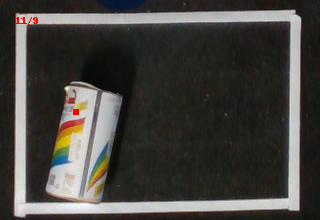

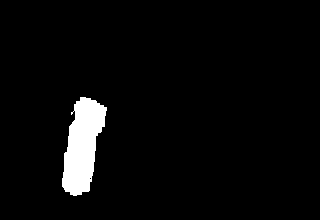

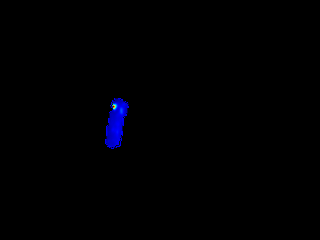

12 actions to pick 10 objects


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/giang/.local/lib/python3.8/site-packages/urx/ursecmon.py", line 286, in run
    data = self._get_data()
  File "/home/giang/.local/lib/python3.8/site-packages/urx/ursecmon.py", line 333, in _get_data
    tmp = self._s_secondary.recv(1024)
socket.timeout: timed out


In [5]:

pickedObject = 0
for i in range (20):
    clear_output(wait=True)
    rgb, depth,mask, pts, cam2wd ,x,y,des, policy = realTest.step()
    
    
    normDes = dc_plotting.normalize_descriptor(des * mask.reshape(480, 640, 1))
    policy = policy.reshape((240,320)).cpu().numpy()
    smallMask = cv2.resize(mask, dsize=(320, 240), interpolation=cv2.INTER_CUBIC)
    #print (policy.shape, smallMask.shape)
    normPolicy = convertToHeatmap ((-policy)*smallMask,smallMask)

    %matplotlib widget
    %matplotlib inline 

    m_rgb = rgb.copy()



    col_range = 3
    x_st = max(x - col_range, 0)
    x_ed = min(x + col_range, rgb.shape[0])
    y_st = max(y - col_range, 0)
    y_ed = min(y + col_range, rgb.shape[1])

    m_rgb[x_st:x_ed, y_st:y_ed] = [255, 0, 0]

    img = Image.fromarray(np.uint8(m_rgb[100:320,150:470,:]))
    draw = ImageDraw.Draw(img)
    #draw.rectangle((170,120,450,310), outline=(0, 255, 0))
    #draw.text((10, y), str(i+1)+"/10", font=font, fill="red",align ="center")
    draw.text((15,15), str(i)+"/"+str(pickedObject), font = font,fill="red", align ="left",size=44 )

    
    
    display(img)
    display(Image.fromarray(np.uint8(mask[100:320,150:470]*255)))
    #display(Image.fromarray(np.uint8(normDes[:,:,:3]*255)))#*mask.reshape(480, 640, 1)*255)))
    display(normPolicy)
    
    r = realTest.pick(rgb, depth, pts, cam2wd,x,y)
    if (r):
        pickedObject +=1
    
    if (pickedObject ==10):
        break
    

print (str(i+1) + " actions to pick "+str(pickedObject)+" objects")

In [ ]:

x_st = max(x - col_range, 0)
x_ed = min(x + col_range, rgb.shape[0])
y_st = max(y - col_range, 0)
y_ed = min(y + col_range, rgb.shape[1])

m_rgb[x_st:x_ed, y_st:y_ed] = [255, 0, 0]
img = Image.fromarray(np.uint8(m_rgb))
draw = ImageDraw.Draw(img)


display(img)


In [ ]:

realTest.pick(rgb, depth, pts, cam2wd,x,y)

In [ ]:
rgbd,depth,pts = realTest.robot.capture_rgbd()

In [ ]:

display(Image.fromarray(rgbd))

In [ ]:
cv2.imwrite("ITRI_rgb.jpg",  rgbd)
cv2.imwrite("ITRI_depth.png", depth)